## Métodos de Aprendizagem de Máquina em Química
 
Prof. Luciano T. Costa \
e-mail: ltcosta@id.uff.br \
Departamento de Físico-Química \
Sala 309 \
Prof. Eduardo Krampser \
e-mail: eduardo.krempser@fiocruz.br \
MolMod-CS: www.molmodcs.uff.br \
Facebook: https://www.facebook.com/molmodcs \
Linkedin: https://www.linkedin.com/in/luciano-t-costa-90a85a164/ 

### O que é Regressão?

- **Análise de Regressão** é um método estatístico para estimar a relação entre uma variável dependente e um ou mais variáveis independentes

- Análise de Regressão é amplamente usada em diferentes áreas da ciência como Química, Física e Biologia, e também em Engenharia e Finanças. 

- Os principais usos de Regressão são:

1) **Predição**: Prever um evento/fato/estado/objeto a partir de um conhecimento prévio
2) **Inferência**: Determinar como um evento/fato/estado/objeto afeta a produção de outro

- Quando usada para a predição, **Análise de Regressão** apresenta uma sobreposição relevante na área de **Aprendizado  de Máquina**

### Modelo Linear de Regressão

$$ y = b_0 + b_1*x_1 + b_2*x_2 + \cdots + b_n*x_n $$

em que nesta equação temos:

- y é o valor predito;
- n é o número de atributos ou *features*;
- $x_i$ é o iésimo valor do atributo ou *feature value*;
- $b_j$ é o jésimo parâmetro do modelo (incluindo o termo de bias, $b_0$, e os  pesos dos atributos, ($b_1, b_2, \cdots,b_n$)).

Esta equação pdoe ser reescrita de forma vetorizada, como segue:

$$ y = h_B(x) = \textbf{B}.\textbf{X} $$

onde:

- $\textbf{B}$ é o vetor de parâmetros do modelo, contendo o termo de *bias* $b_0$ e os pesos dos atributos ou *features*, $b_1$ até $b_n$.
- $\textbf{X}$ é o vetor de atributos ou *features*, contendo $x_0$ a $x_n$ com $x_0$ sempre igual a 1. 
- $\textbf{B}$.$\textbf{X}$ é o produto dos vetores, que resulta em $b_0 x_0 + b_1 x_1 + \cdots + b_n x_n$.
- $h_B(x)$ é a função hipótese, usando o modelo de parâmetros $\textbf{B}$. 

### NOTA IMPORTANTE:

*Em aprendizado de Máquina, vetores são geralmente representados como vetores de coluna, que são matrizes 2D com uma única coluna. Se* $\textbf{B}$ e $\textbf{X}$ *então a predição é* $y = \textbf{B}^{T} \textbf{X}$, *onde* $\textbf{B}^{T}$ *é a transposta de* $\textbf{B}$ *(um vetor linha em vez de um vetor coluna)*

### Como avaliar a performance de uma regressão? 

Uma medida típica de avaliação da performance de uma regressão é o erro da raiz quadrática média, RMSE (do inglês, *Root Mean Square Error*), dado por:

$$ RMSE(X,h) = \sqrt{\frac{1}{m} \sum_{i=1}^{m} \left( h(x^{(i)}) - y^{(i)} \right)^2} $$

A depender dos dados e da dispersão da regressão, pode-se fazer uso erro absoluto médio, MAE (do inglês, *Mean Absolute Error*), dado por:

$$ MAE(X,h) = \frac{1}{m} \sum_{i=1}^{m} | h(x^{(i)}) - y^{(i)} | $$

ou na prática usa-se apenas o MSE, dado por:

$$ MSE(X,h_B) = \frac{1}{m} \sum_{i=1}^{m} \left( \textbf{B}^{T} x^{(i)} - y^{(i)} \right)^2 $$

In [1]:
# Uploading the libraries we need

In [7]:
import numpy as np 
from sklearn.linear_model import LinearRegression

### Trabalhando com dados inseridos na mão

In [8]:
# Creating the dummy dataset x and y

In [9]:
x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1,1))
y = np.array([5, 20, 14, 32, 22, 38])

In [10]:
print(x.shape)

(6, 1)


In [11]:
print(y.shape)

(6,)


In [12]:
# Building the regression model

In [13]:
model = LinearRegression()

In [14]:
model.fit(x,y)         # x is the input data and y is the response

LinearRegression()

In [15]:
model.intercept_        # this is b0 in the model

5.633333333333329

In [16]:
model.coef_             # this is b1 in the model

array([0.54])

In [17]:
r_sq = model.score(x,y)
print(r_sq)

0.7158756137479542


In [18]:
# How to predict a value using this model?

In [19]:
y_pred = model.predict(x)
print(y_pred)

[ 8.33333333 13.73333333 19.13333333 24.53333333 29.93333333 35.33333333]


In [20]:
# The model is described by:  y = b0 + b1*x

In [21]:
model.intercept_ + model.coef_ * x

array([[ 8.33333333],
       [13.73333333],
       [19.13333333],
       [24.53333333],
       [29.93333333],
       [35.33333333]])

In [22]:
# Now let's create a new input data and use this model to predict the responses

In [23]:
x_new = np.arange(5).reshape((-1,1))
print(x_new)

[[0]
 [1]
 [2]
 [3]
 [4]]


In [24]:
y_new = model.predict(x_new)
print(y_new)

[5.63333333 6.17333333 6.71333333 7.25333333 7.79333333]


In [25]:
# plotting the dataset with the MatPlotLib

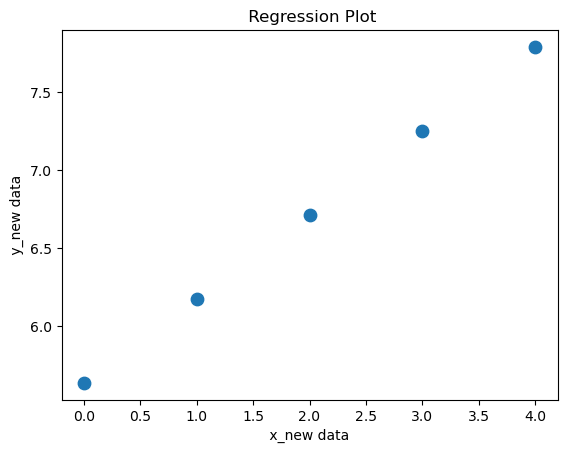

In [26]:
import matplotlib.pyplot as plt
plt.xlabel(' x_new data ')
plt.ylabel(' y_new data ')
plt.title(' Regression Plot')
plt.scatter(x_new, y_new, s=80)

### Trabalhando com dados gerados aleatoriamente

In [27]:
# importando numpy
import numpy as np

In [28]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [29]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [30]:
theta_best

array([[4.48635075],
       [2.70518404]])

In [31]:
X_new = np.array([[0], [2]])

In [32]:
X_new

array([[0],
       [2]])

In [33]:
print(X_new)

[[0]
 [2]]


In [34]:
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance

In [35]:
X_new_b

array([[1., 0.],
       [1., 2.]])

In [36]:
y_predict = X_new_b.dot(theta_best)

In [37]:
y_predict

array([[4.48635075],
       [9.89671883]])

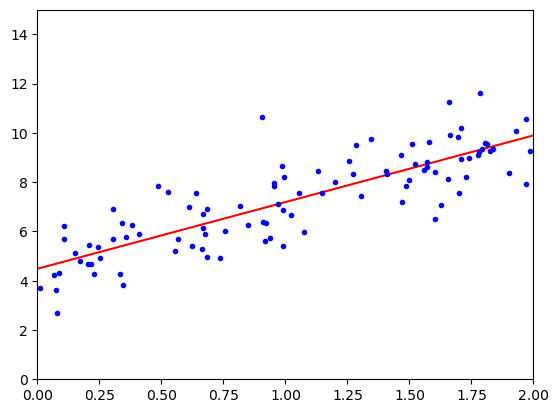

In [38]:
# Vamos plotar este modelo com o matplotlib
import matplotlib.pyplot as plt
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()


### Aprendizado de Máquina usando Scikit-Learn

- Aprendizado de Máquina ocorre quando um programa exibe comportamento que **NÃO** é explicitamente programado, mas que é resultado do aprendizado com os dados. No entanto a melhor forma de entender o aprendizado de máquina é realizando um exemplo, como o que veremos a seguir. 

- A biblioteca `scikit-learn` é abreviada como `sklearn` quando importada. Na demonstração deste exemplo faremos uso dos módulos [`numpy`](), [`pandas`]() e [`matplotlib`](). 

In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
lin_reg = LinearRegression()

In [41]:
lin_reg.fit(X, y)

LinearRegression()

In [42]:
lin_reg.intercept_, lin_reg.coef_

(array([4.48635075]), array([[2.70518404]]))

In [43]:
 lin_reg.predict(X_new)

array([[4.48635075],
       [9.89671883]])

### Regressão com SciPy

- **SciPy** [`(link)`](https://scipy.org/) é uma biblioteca, ou seja, uma coleção de ferramentas e funções numéricas já prontas para resolver os mais diferentes problemas matemáticos em Química, Física, Biologia e Engenharia. Para mais detalhes acesse o [`Tutorial`](https://www.guru99.com/scipy-tutorial.html). Algumas ferramentas e módulos do SciPy são úteis para **álgebra linear** `scipy.linalg`, otimização e ajustes `scipy.optimize`, estatística e números randômicos `scipy.stats`, e integração numérica `scipy.integrate`. 

- Vamos praticar um exercício do excelente livro *on line* elaborado por Charlie Weiss, ver link em [`SciCompforChemists`](https://github.com/weisscharlesj/SciCompforChemists).

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Aprendizado Supervisionado

- Aprendizado supervisionado é quando um algoritmo de aprendizado de máquina possui informações das características e respostas com o objetivo de desenvolver um modelo que faça a predição das respostas com base nas características fornecidas (do inglês, *features and targets prediction model*). 

#### Características e Informação

- O arquivo `ROH_data.csv` contem informação de 70 álcoois simples, incluindo seus pontos de ebulição. Nosso objetivo é gerar uma função ou algoritmo para predizer os pontos de ebulição baseados na informação e características que possuem.



In [45]:
ROH = pd.read_csv('data/ROH_data.csv', sep=',')
ROH.head()

,bp,MW,carbons,degree,aliphatic,avg_aryl_position,cyclic
0,338,32.04,1,1,1,0.0,0
1,351,46.07,2,1,1,0.0,0
2,371,60.10,3,1,1,0.0,0
3,356,60.10,3,2,1,0.0,0
4,391,74.12,4,1,1,0.0,0


O conjunto de dados inclui o ponto de ebulição (K), o peso molecular (g/mol), número de átomos de carbono, se o álcool é ou não alifático, se é cíclico e a posição média dos substituídos aril. O scikit-learn requer que toda `features` (atributos) seja representada numericamente. As três últimas `1` significa VERDADEIRO e `0` FALSO. Observe que nem todo atributo será útil para predizer o ponto de ebulição. A intuição química diz que a massa molar tem uma correlação direta e será importante para essa predição, como mostrado abaixo. 

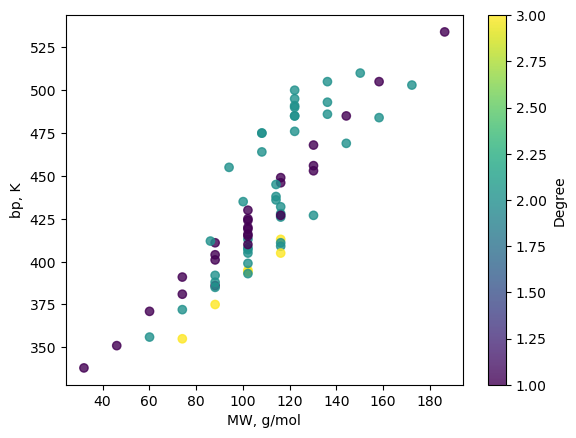

In [46]:
plt.scatter(ROH['MW'], ROH['bp'], alpha=0.8, c=ROH['degree'], cmap='viridis')
plt.xlabel('MW, g/mol')
plt.ylabel('bp, K')
cbar = plt.colorbar()
cbar.set_label('Degree')

### Separando os dados em Treinamento e Teste (*Train Test Split*)

- Qualquer que seja o treinamento de um modelo em `Machine Learning` para fazer predições, é importante avaliar a acurácia dessas predições. É uma decisão não justa testar um algoritmo sobre dados já vistos e/ou treinados anteriormente. No caso dos álcoois e dados que temos no exemplo, treinar sobre um conjunto de álcoois pequenos e testar sobre o conjunto de álcoois maiores pode gerar uma predição ruim, já que o algoritmo de ML não está familiarizado com um conjunto de estrutura de maior massa molar. A boa notícia é que o scikit-learn possui uma `built-in function` para embaralhar e separar o conjunto de dados em **TREINAMENTO** e **TESTE**, `train_test_split()`.
- *The arguments are the **features, target, and the fraction** of the data set to be used for testing. Below, a quarter of the data set is allotted for testing (test_size=0.25).*

```{tip}
The `train_test_splot()` function randomly shuffles the data set before splitting it resulting in different results each time the function is called. The `random_state=` argument can be used to produce fixed results for example or demo purposes.
```

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
target = ROH['bp']
features = ROH[[ 'MW', 'carbons', 'degree', 'aliphatic', 
                'avg_aryl_position','cyclic']]

In [49]:
X_train, X_test, y_train, y_test =train_test_split(features, target, 
                                                   test_size=0.25, random_state=18)

The output includes four values containing the training/testing features and targets. By convention, `X` contains the features and `y` are the target values because they are the independent and dependent variables, respectively; and the features variable is capitalized because it contains multiple values per alcohol.


```{tip}
Another variable name convention is to capitalize variables that contain a collection and use lowercase letters for single values. For example, a single $x$ value in a plot would be `x` while a list containing multiple $x$ values would be `X`.
```


## Training a Linear Regression Model

```{index} single: regression; machine learning
```

Now for some machine learning using a very simple *linear regression* model. This model treats the target value as a linear combination or weighted sum of the features where $x$ are the features and $w$ are the weights.

$$ target = w_0x_0 + w_1x_1 + w_2x_2 + w_3x_3 + w_4x_4 + w_5x_5 + ... $$

The general procedure for supervised machine learning, regardless of model, usually includes three steps.

1. Create a model and attach it to a variable
2. Train the model with the training data
3. Evaluate the model using the testing data or use it to make predictions.

To implement these steps, the linear model from the `linear_model` module is first created with the `LinearRegression()` function and assigned the variable `reg`. Next, it is trained using the `fit()` method and the training data from above.

In [119]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score 

In [120]:
reg = linear_model.LinearRegression()

In [121]:
reg.fit(X_train, y_train)

LinearRegression()

In [122]:
prediction = reg.predict(X_test)
prediction

array([521.94389573, 439.60028899, 421.38488633, 485.6143471 ,
       355.07207513, 444.98911542, 439.60028899, 487.61879909,
       488.64633926, 497.31838329, 388.22848073, 406.39325504,
       424.6086577 , 444.98911542, 485.56371876, 439.60028899,
       503.77912142, 409.61702641])

In [123]:
y_pred = reg.predict(X_test)
print(y_pred)

[521.94389573 439.60028899 421.38488633 485.6143471  355.07207513
 444.98911542 439.60028899 487.61879909 488.64633926 497.31838329
 388.22848073 406.39325504 424.6086577  444.98911542 485.56371876
 439.60028899 503.77912142 409.61702641]


Remember that the algorithm has been only provided the features for the testing subset; it has never seen the y_test target data. The performance can be assessed by plotting the predictions against the true values.

In [124]:
print(reg.coef_)

[ -5.06283477  89.19634615 -14.99163129   5.73273187  -2.05508033
  15.9368917 ]


In [126]:
print(reg.intercept_)

412.78616575428634


In [127]:
MSE = mean_squared_error(y_test, y_pred)
R2 = reg.score(X_test,y_test)
print(f"Mean Squared Error (MSE): {MSE}")
print(f"R-Squared (R2): {R2}")

Mean Squared Error (MSE): 49.17080312261136
R-Squared (R2): 0.9738116533899367


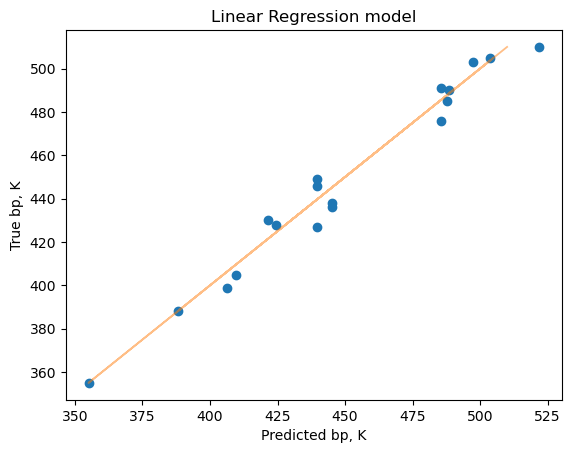

In [57]:
plt.plot(prediction, y_test, 'o')
plt.plot(y_test, y_test, '-', lw=1.3, alpha=0.5)
plt.title("Linear Regression model")
plt.xlabel('Predicted bp, K')
plt.ylabel('True bp, K');

### Model Evaluation

It is important to evaluate the effectiveness of trained machine learning models before rolling them out for widespread use, and scikit-learn provides multiple built-in functions to help in this task. The first is the `score()` method. Instead of making predictions using the testing features and then plotting the predictions against the known values, the `score()` method takes in the testing features and target values and returns the $r^2$. The closer the $r^2$ value is to 1, the better the predictions are.

In [58]:
reg.score(X_test, y_test)

0.9738116533899367

## Ridge Regression or Tikhonov regularization

``` (info class)
class sklearn.linear_model.Ridge(alpha=1.0, *, fit_intercept=True, copy_X=True, max_iter=None, tol=0.0001, solver='auto', positive=False, random_state=None)
```    


A Ridge Regression é uma técnica de regressão linear regularizada que visa lidar com o problema de multicolinearidade (alta correlação entre variáveis independentes) e, ao mesmo tempo, reduzir o risco de overfitting em modelos de regressão. A Ridge Regression é uma extensão da regressão linear simples que adiciona uma penalização L2 (também conhecida como norma euclidiana) aos coeficientes do modelo. É um modelo em que a função de penalização é uma função de mínimos quadrados linear e a regularização é dada por uma norma L2. Detalhes sobre o método pode ser visto no [`link`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html). 


In [59]:
from sklearn.linear_model import Ridge

In [60]:
clf = Ridge(alpha=4.0,positive=False,solver='auto')

In [61]:
clf.fit(X_train,y_train)

Ridge(alpha=4.0)

In [62]:
Ridge()

Ridge()

In [63]:
prediction = clf.predict(X_test)

In [64]:
prediction

array([520.35326579, 438.53093332, 420.65880423, 484.59429277,
       362.7223054 , 451.79552689, 438.53093332, 479.75718076,
       477.33494604, 498.95275902, 391.69055481, 409.57004132,
       427.44217041, 451.79552689, 484.60165019, 438.53093332,
       502.47377928, 416.3534075 ])

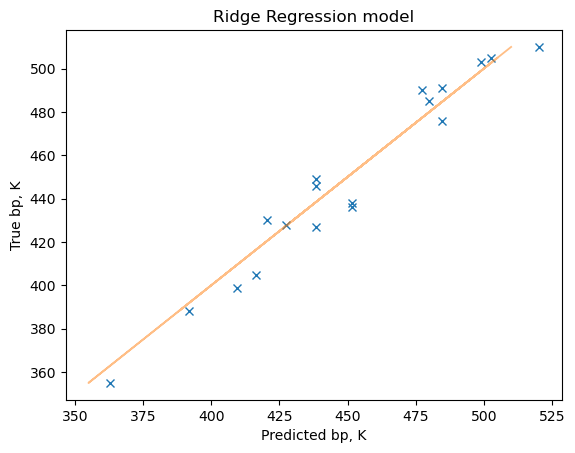

In [65]:
plt.plot(prediction, y_test, 'x')
plt.plot(y_test, y_test, '-', lw=1.3, alpha=0.5)
plt.title("Ridge Regression model")
plt.xlabel('Predicted bp, K')
plt.ylabel('True bp, K');

In [66]:
clf.score(X_test,y_test)

0.9534721290079212

In [67]:
print(clf.coef_)

[  0.7357423    7.55702199 -11.08876291 -10.62740308   4.84446943
  15.20479542]


In [68]:
print(clf.intercept_)

321.85468970679995


## Ridge Regression or Tikhonov regularization

``` (info class)
class sklearn.kernel_ridge.KernelRidge(alpha=1, *, kernel='linear', gamma=None, degree=3, coef0=1, kernel_params=None)
```    


Kernel ridge regression (KRR) combines ridge regression (linear least squares with l2-norm regularization) with the kernel trick. It thus learns a linear function in the space induced by the respective kernel and the data. For non-linear kernels, this corresponds to a non-linear function in the original space.

The form of the model learned by KRR is identical to support vector regression (SVR). However, different loss functions are used: KRR uses squared error loss while support vector regression uses epsilon-insensitive loss, both combined with l2 regularization. In contrast to SVR, fitting a KRR model can be done in closed-form and is typically faster for medium-sized datasets. On the other hand, the learned model is non-sparse and thus slower than SVR, which learns a sparse model for epsilon > 0, at prediction-time.

This estimator has built-in support for multi-variate regression (i.e., when y is a 2d-array of shape ([n_samples, n_targets]).

In [69]:
from sklearn.kernel_ridge import KernelRidge

In [70]:
clf_KRR = KernelRidge(alpha=1.0,kernel='linear')

In [71]:
clf_KRR.fit(X_train,y_train)

KernelRidge(alpha=1.0)

In [72]:
KernelRidge()

KernelRidge()

In [73]:
prediction = clf_KRR.predict(X_test)

In [74]:
prediction

array([533.13079444, 433.60663934, 408.96788232, 483.60308163,
       362.19111245, 459.22271795, 433.60663934, 464.8714982 ,
       455.4431568 , 533.91243706, 385.57949739, 410.34335379,
       434.98211082, 459.22271795, 483.72818101, 433.60663934,
       508.36693804, 436.35758229])

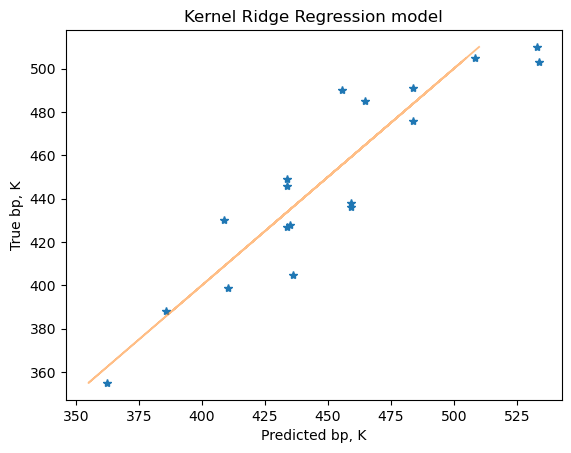

In [75]:
plt.plot(prediction, y_test, '*')
plt.plot(y_test, y_test, '-', lw=1.3, alpha=0.5)
plt.title("Kernel Ridge Regression model")
plt.xlabel('Predicted bp, K')
plt.ylabel('True bp, K');

In [76]:
clf_KRR.score(X_test,y_test)

0.8135825515120059

### Ridge Regression Cross-Validation



"""
class sklearn.linear_model.RidgeCV(alphas=(0.1, 1.0, 10.0), *, fit_intercept=True, scoring=None, cv=None, gcv_mode=None, store_cv_values=False, alpha_per_target=False)
"""

In [113]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error, r2_score    

In [101]:
clf = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1, 2, 3, 4, 5], store_cv_values = True, alpha_per_target = True)

- **alphas:** *alphasarray-like of shape (n_alphas,), default=(0.1, 1.0, 10.0)*

Array of alpha values to try. Regularization strength; must be a positive float. Regularization improves the conditioning of the problem and reduces the variance of the estimates. Larger values specify stronger regularization. To know more, see the [`link`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html).

- **store_cv_values:** *bool, default=False*

Flag indicating if the cross-validation values corresponding to each alpha should be stored in the cv_values_ attribute (see below). This flag is only compatible with cv=None (i.e. using Leave-One-Out Cross-Validation).

- **alpha_per_target:** *bool, default=False*

Flag indicating whether to optimize the alpha value (picked from the alphas parameter list) for each target separately (for multi-output settings: multiple prediction targets). When set to True, after fitting, the alpha_ attribute will contain a value for each target. When set to False, a single alpha is used for all targets.

In [102]:
clf.fit(X_train,y_train)

RidgeCV(alpha_per_target=True, alphas=[0.001, 0.01, 0.1, 1, 2, 3, 4, 5],
        store_cv_values=True)

In [103]:
RidgeCV()

RidgeCV()

In [104]:
prediction = clf.predict(X_test)

In [105]:
clf.coef_

array([ -5.00766467,  88.42081454, -14.99015295,   5.51407447,
        -2.02306591,  16.03568563])

In [106]:
clf.intercept_

412.01917841657

In [107]:
prediction

array([521.93905378, 439.59816751, 421.38481159, 485.61249523,
       355.07794715, 445.19503171, 439.59816751, 487.58548449,
       488.59701745, 497.31120831, 388.23137937, 406.39465865,
       424.60801457, 445.19503171, 485.56241858, 439.59816751,
       503.77577451, 409.61786162])

In [118]:
MSE = mean_squared_error(y_test, y_pred)
R2 = clf.score(X_test,y_test)
print(f"Mean Squared Error (MSE): {MSE}")
print(f"R-Squared (R2): {R2}")


Mean Squared Error (MSE): 49.17080312261136
R-Squared (R2): 0.9736149799671107


In [109]:
clf.get_params

<bound method BaseEstimator.get_params of RidgeCV(alpha_per_target=True, alphas=[0.001, 0.01, 0.1, 1, 2, 3, 4, 5],
        store_cv_values=True)>

In [110]:
print(np.mean(clf.cv_values_, axis=0))

[ 85.26124502  86.65181205  88.88415735  96.03487179 103.13753244
 110.80706077 118.1622783  124.94024738]


In [136]:
clf.alpha_

0.001

In [137]:
clf.coef_

array([ -5.00766467,  88.42081454, -14.99015295,   5.51407447,
        -2.02306591,  16.03568563])

### Entendendo a Regularização e o Hiperparâmetro Alfa

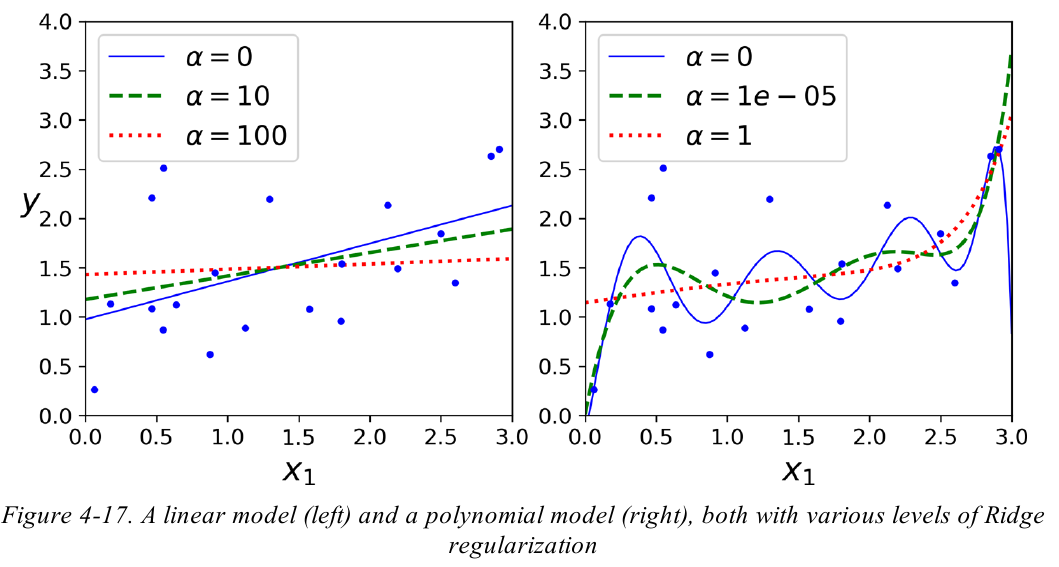

In [139]:
from IPython import display
display.Image("data/ridge-graph.png", width = 600, height = 300)

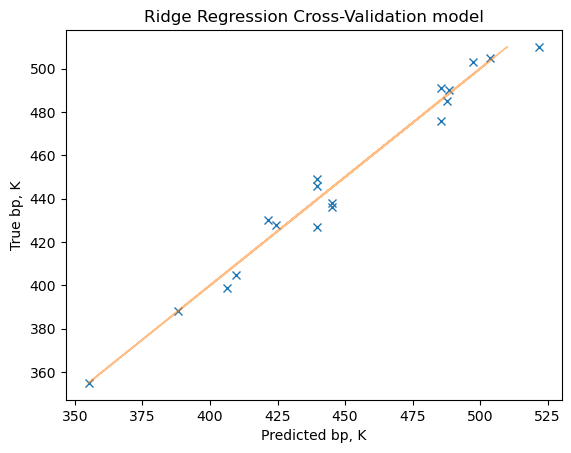

In [88]:
plt.plot(prediction, y_test, 'x')
plt.plot(y_test, y_test, '-', lw=1.3, alpha=0.5)
plt.title("Ridge Regression Cross-Validation model")
plt.xlabel('Predicted bp, K')
plt.ylabel('True bp, K');

### EXEMPLOS AVANÇADOS E PRÁTICA

Em muitas situações as variações dos métodos, especialmente na penalização do ajuste aos dados, tentam mitigar imprecisões dos dados obtidos. O exemplo a seguir inclui um "ruído" aos dados de treinamento para indicar possíveis variações nos modelos preditivos gerados.

In [177]:
X_train_rn = .1 * np.random.normal(size=(54, 6)) + X_train

In [178]:
X_train_rn

,MW,carbons,degree,aliphatic,avg_aryl_position,cyclic
45,130.139360,7.920701,2.100821,1.063333,0.020451,0.174048
30,102.282155,6.054975,0.825102,0.991117,0.108951,-0.149002
38,116.359132,6.905529,2.173205,0.883768,-0.086015,-0.083659
27,102.146788,5.964291,1.036386,1.151425,0.003317,0.063493
20,102.205414,6.026956,0.808039,0.854050,0.152181,-0.100433
31,102.111668,5.874273,0.883288,0.856881,-0.101244,-0.149591
22,102.121010,6.103780,3.045764,1.070763,-0.114063,-0.150417
25,102.283903,5.856666,1.928246,0.897069,0.060455,-0.182600
2,59.980038,3.075998,0.815367,1.021479,-0.150391,-0.051751
23,102.205802,5.945368,2.881200,1.012520,0.147568,-0.023073


In [179]:
reg.fit(X_train_rn, y_train)

LinearRegression()

In [180]:
reg.score(X_test,y_test)

0.9344194974892706

In [181]:
clf.fit(X_train_rn, y_train)

Ridge(alpha=4.0)

In [182]:
clf.score(X_test,y_test)

0.949908192680655